# I. Tải và chuẩn hóa dữ liệu

In [1]:
# import thư viện numpy
import numpy as np
# import thư viện tensorflow
import tensorflow as tf
# import thư viện matplotlib
import matplotlib.pyplot as plt

# Tải dữ liệu data X và y đã được xử lý thành ma trận
data_X = np.load("F:/UIT/ML/House_Boston/train_X.npy") 
data_y = np.load("F:/UIT/ML/House_Boston/train_y.npy")
 
# Chuẩn hóa dữ liệu
def normalizer(dataset):
    # Tìm giá trung bình của mỗi đặc trưng
    mu = np.mean(dataset,axis=0)
    # Tìm độ lệch chuẩn của mỗi đặc trưng
    sigma = np.std(dataset,axis=0)
 
    return(dataset - mu)/sigma

# Thêm cột giá trị bias cho dữ liệu
def bias_vector(features,labels):
    # Lấy số lượng mẫu
    n_training_samples = features.shape[0]
    # Lấy số lượng đặc trưng
    n_dim = features.shape[1]
    # Thêm vào cột bias (cột toàn giá trị 1) cho ma trận thuộc tính
    f = np.reshape(np.c_[np.ones(n_training_samples),features],[n_training_samples,n_dim + 1])
    # Chuyển ma trận nhãn về kích thước Nx1
    l = np.reshape(labels,[n_training_samples,1]) 
    return f, l

train_X = normalizer(data_X)
train_X, train_y = bias_vector(train_X, data_y)

print("Đã tải và chuẩn hóa dữ liệu")

Đã tải và chuẩn hóa dữ liệu


# II. Xây dựng model

In [5]:
# Khởi tạo ma trận biến cho model tensorflow với giá trị khởi tạo tại mỗi phần tử là 0
W = tf.Variable(tf.zeros([train_X.shape[1], 1]))

# Xây dưng placeholder dùng để đổ dữ liệu train_X vào khi huấn luyện với kiểu dữ liệu liệu float32 và kích thước [?, 14] 
X = tf.placeholder(tf.float32, [None, train_X.shape[1]])
# Xây dưng placeholder dùng để đổ dữ liệu train_y vào khi huấn luyện với kiểu dữ liệu liệu float32 và kích thước [?, 1] 
y = tf.placeholder(tf.float32, [None, 1])

# Tính y_hat (tf.matmul tương đương phép nhân ma trận)
y_hat = tf.matmul(X, W)
# Tính cost (tf.square tương đương phép bình phương mỗi phần tử; tf.reduce_mean tương đương phép lấy trung bình cộng)
cost = tf.reduce_mean(tf.square(y - y_hat))

# Thiết lập phép tối ưu hóa cost bằng phương pháp Gradient Descent với learning rate = 0.01
train = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

# III. Train dữ liệu và tối ưu bằng BGD

epoch :  0       cost =  583.55634
epoch :  50       cost =  94.03435
epoch :  100       cost =  33.530117
epoch :  150       cost =  25.183605
epoch :  200       cost =  23.829
epoch :  250       cost =  23.47622
epoch :  300       cost =  23.306597
epoch :  350       cost =  23.19523
epoch :  400       cost =  23.11503
epoch :  450       cost =  23.05545
epoch :  500       cost =  23.010368
epoch :  550       cost =  22.975723
epoch :  600       cost =  22.94871
epoch :  650       cost =  22.927347
epoch :  700       cost =  22.910223
epoch :  750       cost =  22.89633
epoch :  800       cost =  22.884928
epoch :  850       cost =  22.87547
epoch :  900       cost =  22.86755
epoch :  950       cost =  22.860868
epoch :  1000       cost =  22.855192
epoch :  1050       cost =  22.850336
epoch :  1100       cost =  22.846165
epoch :  1150       cost =  22.842566
epoch :  1200       cost =  22.839447
epoch :  1250       cost =  22.836739
epoch :  1300       cost =  22.834381
epoch :  

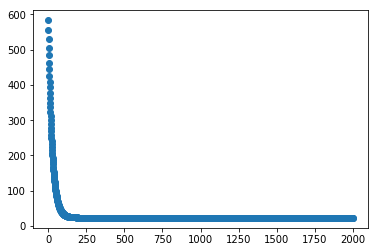

In [6]:
# Khởi tạo tất cả các biến
init = tf.global_variables_initializer()
# Khởi tạo phiên làm việc mới
session = tf.Session()
# Chạy các biến đã khởi tạo
session.run(init)

# List lưu các mse
all_mse = []
# Khởi tạo số vòng lặp
num = 2000
# Huấn luyện model
for e in range(num):
    # Đổ dữ liệu và huấn luyện
    result, err = session.run([train, cost], feed_dict = {X : train_X, y : train_y})
    # Thêm mse vào list
    all_mse.append(err)
    if e % 50 == 0:
        # In ra cost tại vòng lặp thứ e
        print("epoch : ", e, "      cost = ", err)

print("epoch : ", e, "      cost = ", err)

# Vẽ đồ thị biễu diễn cost qua từng vòng lặp
axis_x = list(range(num))
axis_y = all_mse
plt.scatter(axis_x, axis_y)
plt.show()

# IV. Kiểm tra model được train và tối ưu bằng BGD

In [7]:
# Tải dữ liệu data X và y đã được xử lý thành ma trận
data_test_X = np.load("F:/UIT/ML/House_Boston/test_X.npy")
data_test_y = np.load("F:/UIT/ML/House_Boston/test_y.npy")


test_X = normalizer(data_test_X)
test_X, test_y = bias_vector(test_X, data_test_y)

# Tính y_hat khi đổ dữ liệu test_X
y_pred = session.run(y_hat, feed_dict={X: test_X})

# Tính mse
mse = session.run(tf.reduce_mean(tf.square(y_pred - test_y)))

print("MSE trên test set = ", mse)

MSE trên test set =  21.99362143682105


# V. Train dữ liệu và tối ưu bằng SGD

epoch :  0       cost =  583.55634
epoch :  20       cost =  26.640696
epoch :  40       cost =  26.640852
epoch :  60       cost =  26.640852
epoch :  80       cost =  26.640848
epoch :  100       cost =  26.640858
epoch :  120       cost =  26.640863
epoch :  140       cost =  26.640858
epoch :  160       cost =  26.640852
epoch :  180       cost =  26.640852
epoch :  200       cost =  26.640854
epoch :  220       cost =  26.640852
epoch :  240       cost =  26.640858
epoch :  260       cost =  26.640848
epoch :  280       cost =  26.640863
epoch :  300       cost =  26.640852
epoch :  320       cost =  26.640854
epoch :  340       cost =  26.640858
epoch :  360       cost =  26.640852
epoch :  380       cost =  26.640858
epoch :  399       cost =  26.640852


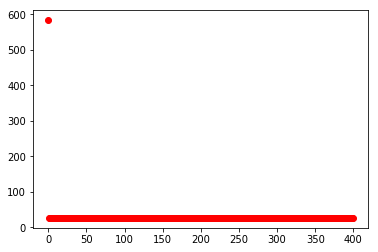

In [8]:
# Khởi tạo tất cả các biến
init = tf.global_variables_initializer()
# Khởi tạo phiên làm việc mới
session = tf.Session()
# Chạy các biến đã khởi tạo
session.run(init)

# List lưu các mse
all_mse = []
# Khởi tạo số vòng lặp
num = 400
# Huấn luyện model
for e in range(num):
    err = session.run(cost, feed_dict = {X : train_X, y : train_y})
    all_mse.append(err)
    # Lần lượt duyệt qua mối điểm dữ liệu trên tập train
    for i in range(train_X.shape[0]):
        # Đổ 1 điểm dữ liệu để train
        session.run(train, feed_dict = {X : train_X[i].reshape(1, train_X.shape[1]), y : train_y[i].reshape(1, 1)})
    if e % 20 == 0:
        # In ra cost tại vòng lặp thứ e
        print("epoch : ", e, "      cost = ", err)
print("epoch : ", e, "      cost = ", err)

# Vẽ đồ thị biễu diễn cost qua từng vòng lặp
axis_x = list(range(num))
axis_y = all_mse
plt.scatter(axis_x, axis_y, c='r', label='data')
plt.show()

# VI. Kiểm tra model được train và tối ưu bằng SGD

In [9]:
# Tải dữ liệu data X và y đã được xử lý thành ma trận
data_test_X = np.load("F:/UIT/ML/House_Boston/test_X.npy")
data_test_y = np.load("F:/UIT/ML/House_Boston/test_y.npy")


test_X = normalizer(data_test_X)
test_X, test_y = bias_vector(test_X, data_test_y)

# Tính y_hat khi đổ dữ liệu test_X
y_pred = session.run(y_hat, feed_dict={X: test_X})

# Tính mse
mse = session.run(tf.reduce_mean(tf.square(y_pred - test_y)))

print("MSE trên test set = ", mse)

MSE trên test set =  22.991640990708145


# VII. Train dữ liệu và tối ưu bằng mini-BGD

epoch :  0       cost =  583.55634
epoch :  20       cost =  44.91137
epoch :  40       cost =  24.695065
epoch :  60       cost =  23.519375
epoch :  80       cost =  23.25425
epoch :  100       cost =  23.112778
epoch :  120       cost =  23.02529
epoch :  140       cost =  22.968552
epoch :  160       cost =  22.930342
epoch :  180       cost =  22.903685
epoch :  200       cost =  22.884487
epoch :  220       cost =  22.870281
epoch :  240       cost =  22.859518
epoch :  260       cost =  22.851223
epoch :  280       cost =  22.844734
epoch :  300       cost =  22.839596
epoch :  320       cost =  22.835506
epoch :  340       cost =  22.832224
epoch :  360       cost =  22.829584
epoch :  380       cost =  22.827448
epoch :  399       cost =  22.825796


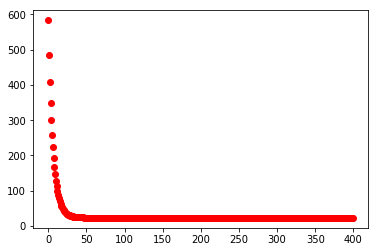

In [10]:
# Khởi tạo tất cả các biến
init = tf.global_variables_initializer()
# Khởi tạo phiên làm việc mới
session = tf.Session()
# Chạy các biến đã khởi tạo
session.run(init)

# Thiết lập batch size
batch_size = 84
# List lưu các mse
all_mse = []
# Khởi tạo số vòng lặp
num = 400
# Huấn luyện model
for e in range(num):
    err = session.run(cost, feed_dict = {X : train_X, y : train_y})
    all_mse.append(err)
    # Chia dữ liệu train ra thành từng phần với kích thước batch_sizex14
    for i in range(0, train_X.shape[0], batch_size):
        # Đổ phần dữ liệu được cắt vào để train
        session.run([train, cost], feed_dict = {X : train_X[i:i+batch_size].reshape(batch_size, train_X.shape[1]), y : train_y[i:i+batch_size].reshape(batch_size, 1)})
    if e % 20 == 0:
        print("epoch : ", e, "      cost = ", err)
print("epoch : ", e, "      cost = ", err)

# Vẽ đồ thị biễu diễn cost qua từng vòng lặp
axis_x = list(range(num))
axis_y = all_mse
plt.scatter(axis_x, axis_y, c='r', label='data')
plt.show()

# VIII. Kiểm tra model được train và tối ưu bằng mini-BGD

In [11]:
# Tải dữ liệu data X và y đã được xử lý thành ma trận
data_test_X = np.load("F:/UIT/ML/House_Boston/test_X.npy")
data_test_y = np.load("F:/UIT/ML/House_Boston/test_y.npy")


test_X = normalizer(data_test_X)
test_X, test_y = bias_vector(test_X, data_test_y)

# Tính y_hat khi đổ dữ liệu test_X
y_pred = session.run(y_hat, feed_dict={X: test_X})

# Tính mse
mse = session.run(tf.reduce_mean(tf.square(y_pred - test_y)))

print("MSE trên test set = ", mse)

MSE trên test set =  22.004941590851516
